In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Batting Scorecard Analysis/EDA and Data Cleaning/Batsman Performance Metrics.csv')
df

,Team,Player,BFI,BI,FSS,CS,RBWI,BII,FSRatio
0,"Brandon CC, Durham Under 13",Thom Burnham,18.0000,5.0000,0.5278,5.0160,0.2687,0.5000,0.05
1,"Brandon CC, Durham Under 13",William Curry,28.0000,10.5000,0.6786,12.9010,0.3333,0.7500,0.09
2,Tudhoe CC Under 13,A Lawrence,14.8571,8.5714,0.7500,8.3572,0.2022,0.5714,0.15
3,Tudhoe CC Under 13,Henry Clasper,16.1667,4.6667,0.6495,6.8145,0.3889,0.3333,0.07
4,Tudhoe CC Under 13,N Clasper,14.3333,2.6667,0.7093,7.2084,0.5488,0.5000,0.04
...,...,...,...,...,...,...,...,...,...
264,Burnopfield CC Under 13,Jack Atkinson,13.2500,5.5000,0.8113,8.7183,0.4375,0.5000,0.04
265,Burnhope CC Under 13,Bradley Reay,16.5000,4.6667,0.4848,3.8800,0.2174,0.5000,0.07
266,Burnhope CC Under 13,M Reynoldson,31.0000,7.0000,0.3629,4.0838,0.1453,0.5000,0.07
267,Consett CC Under 13,Noah Raine,12.0000,3.0000,0.4583,2.5190,0.2222,0.2500,0.03


In [ ]:
descriptive_stats = df.describe()
descriptive_stats

,BFI,BI,FSS,CS,RBWI,BII,FSRatio
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,15.908951,5.462884,0.627683,8.076134,0.326719,0.446522,0.065732
std,5.965744,4.492395,0.306734,7.685751,0.146066,0.283776,0.055440
min,6.000000,0.000000,0.076900,0.051400,-0.025600,0.000000,0.000000
25%,11.000000,1.714300,0.386400,2.010100,0.215400,0.222200,0.020000
50%,14.600000,4.000000,0.616700,5.600800,0.317600,0.444400,0.050000
75%,19.500000,8.250000,0.851100,11.693200,0.417600,0.666700,0.100000
max,40.142900,24.500000,1.708300,37.822500,1.122400,1.000000,0.250000


In [ ]:
descriptive_stats.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Batting Scorecard Analysis/EDA and Data Cleaning/descriptive_stats.csv')


In [ ]:
numeric_data = df.select_dtypes(include=['number'])
numeric_data

,BFI,BI,FSS,CS,RBWI,BII,FSRatio
0,18.0000,5.0000,0.5278,5.0160,0.2687,0.5000,0.05
1,28.0000,10.5000,0.6786,12.9010,0.3333,0.7500,0.09
2,14.8571,8.5714,0.7500,8.3572,0.2022,0.5714,0.15
3,16.1667,4.6667,0.6495,6.8145,0.3889,0.3333,0.07
4,14.3333,2.6667,0.7093,7.2084,0.5488,0.5000,0.04
...,...,...,...,...,...,...,...
264,13.2500,5.5000,0.8113,8.7183,0.4375,0.5000,0.04
265,16.5000,4.6667,0.4848,3.8800,0.2174,0.5000,0.07
266,31.0000,7.0000,0.3629,4.0838,0.1453,0.5000,0.07
267,12.0000,3.0000,0.4583,2.5190,0.2222,0.2500,0.03


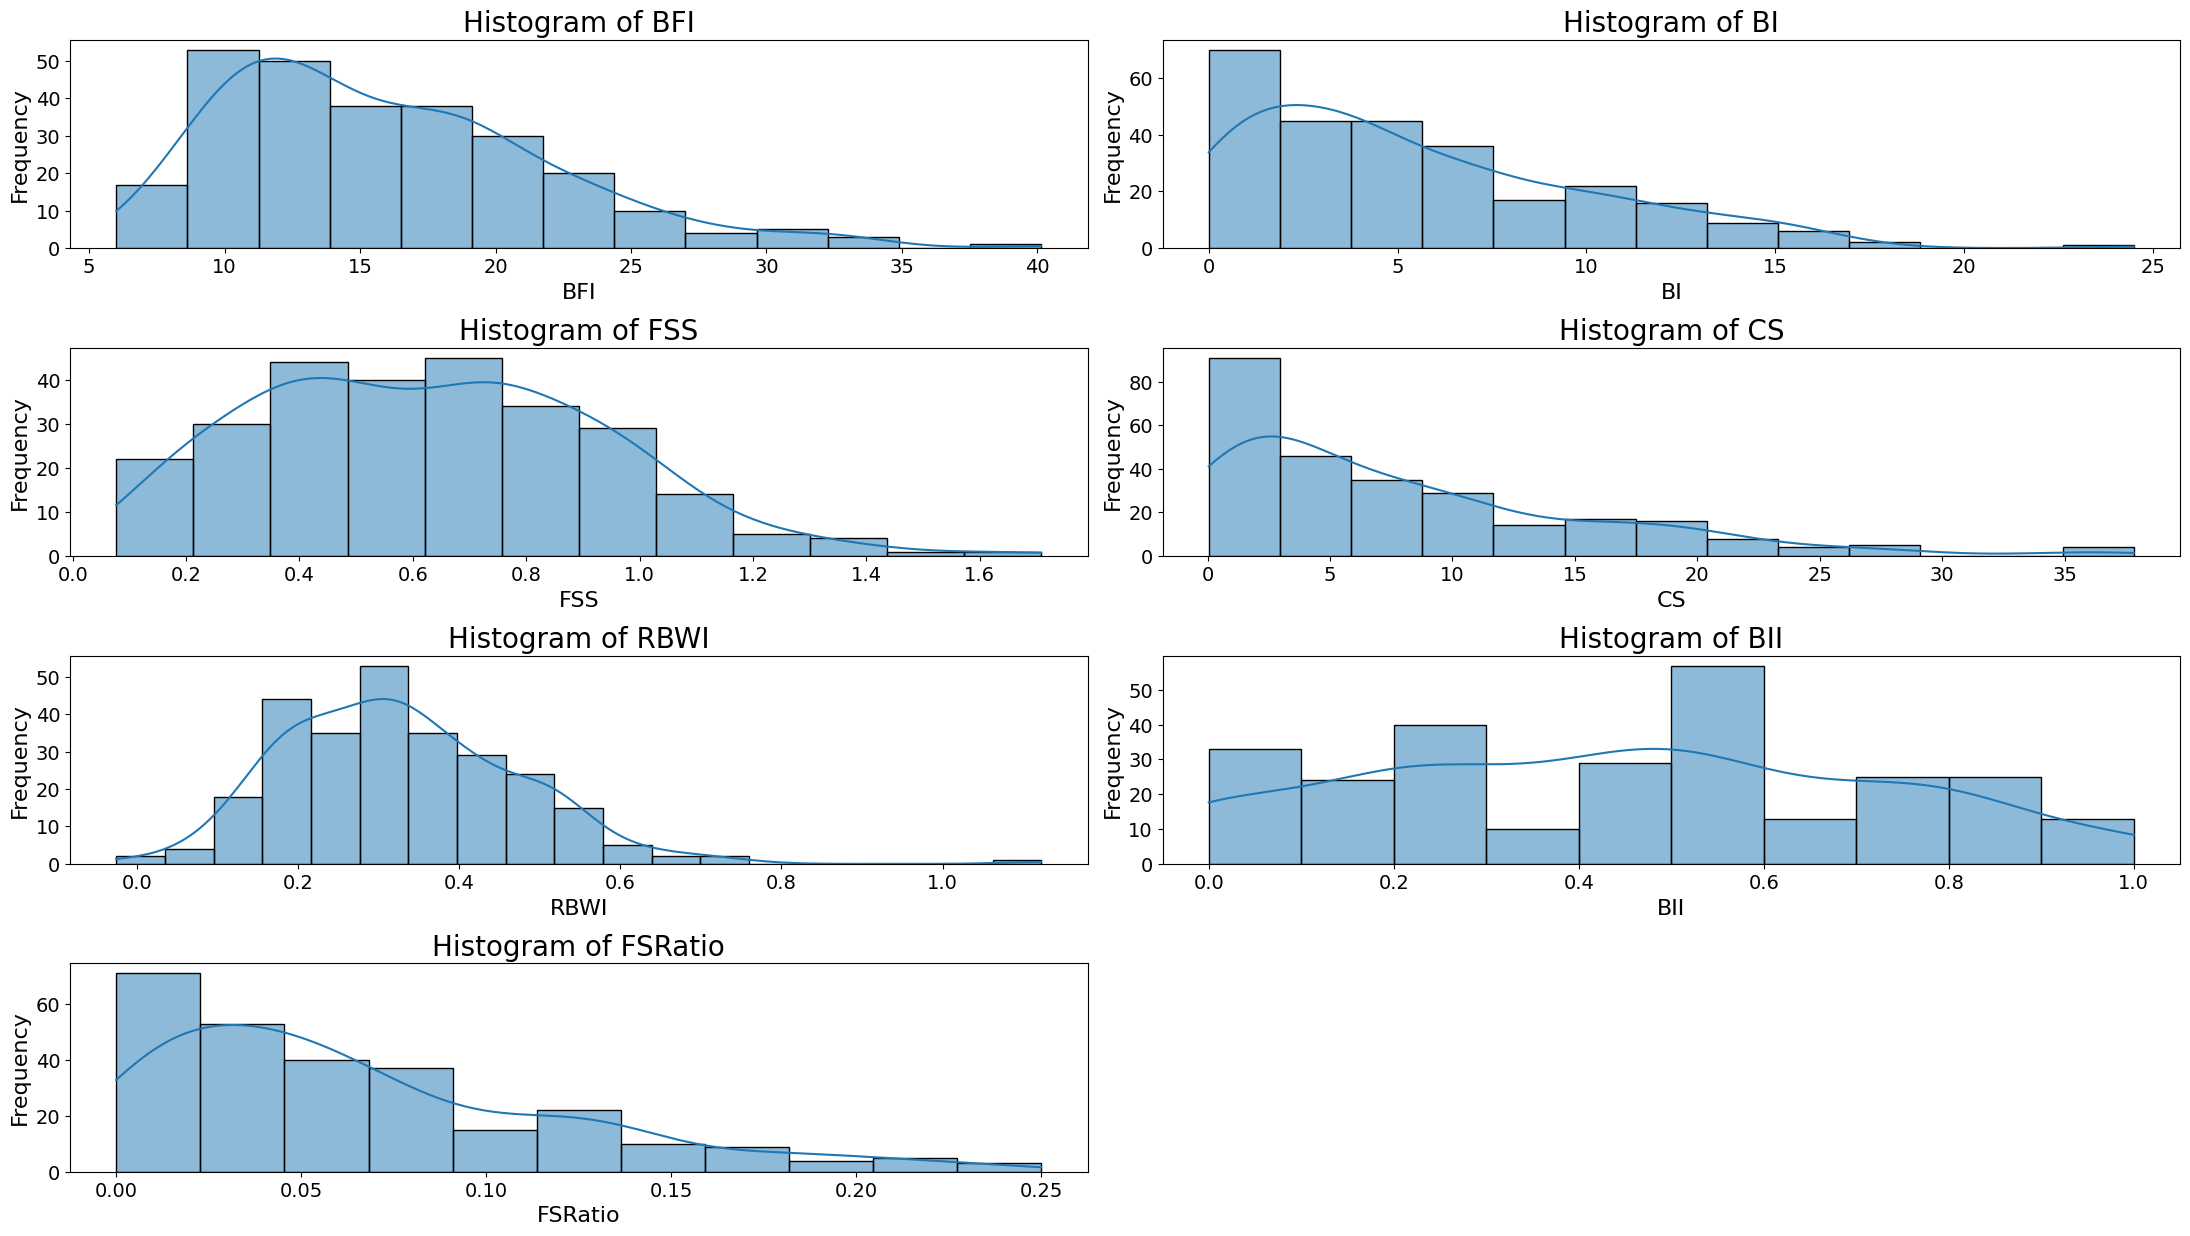

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features = numeric_data.columns.tolist()

plt.figure(figsize=(22, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}', fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(feature, fontsize=16)
    plt.ylabel('Frequency', fontsize=16)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Batting Scorecard Analysis/EDA and Data Cleaning/Performance Metrics Histograms.png')
plt.show()


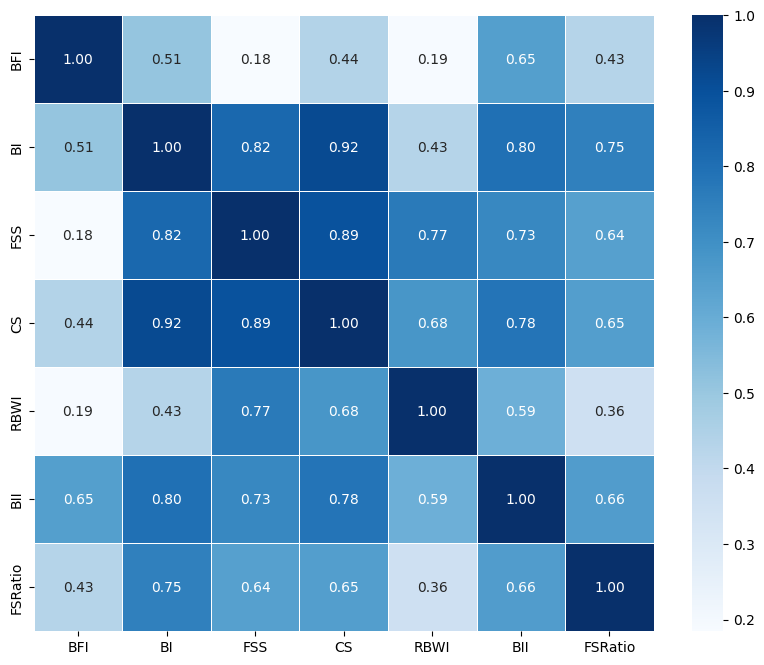

In [ ]:
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5, fmt='.2f')
# plt.title('Correlation Matrix of Perfomrance Metrics', fontsize=14)
plt.show()


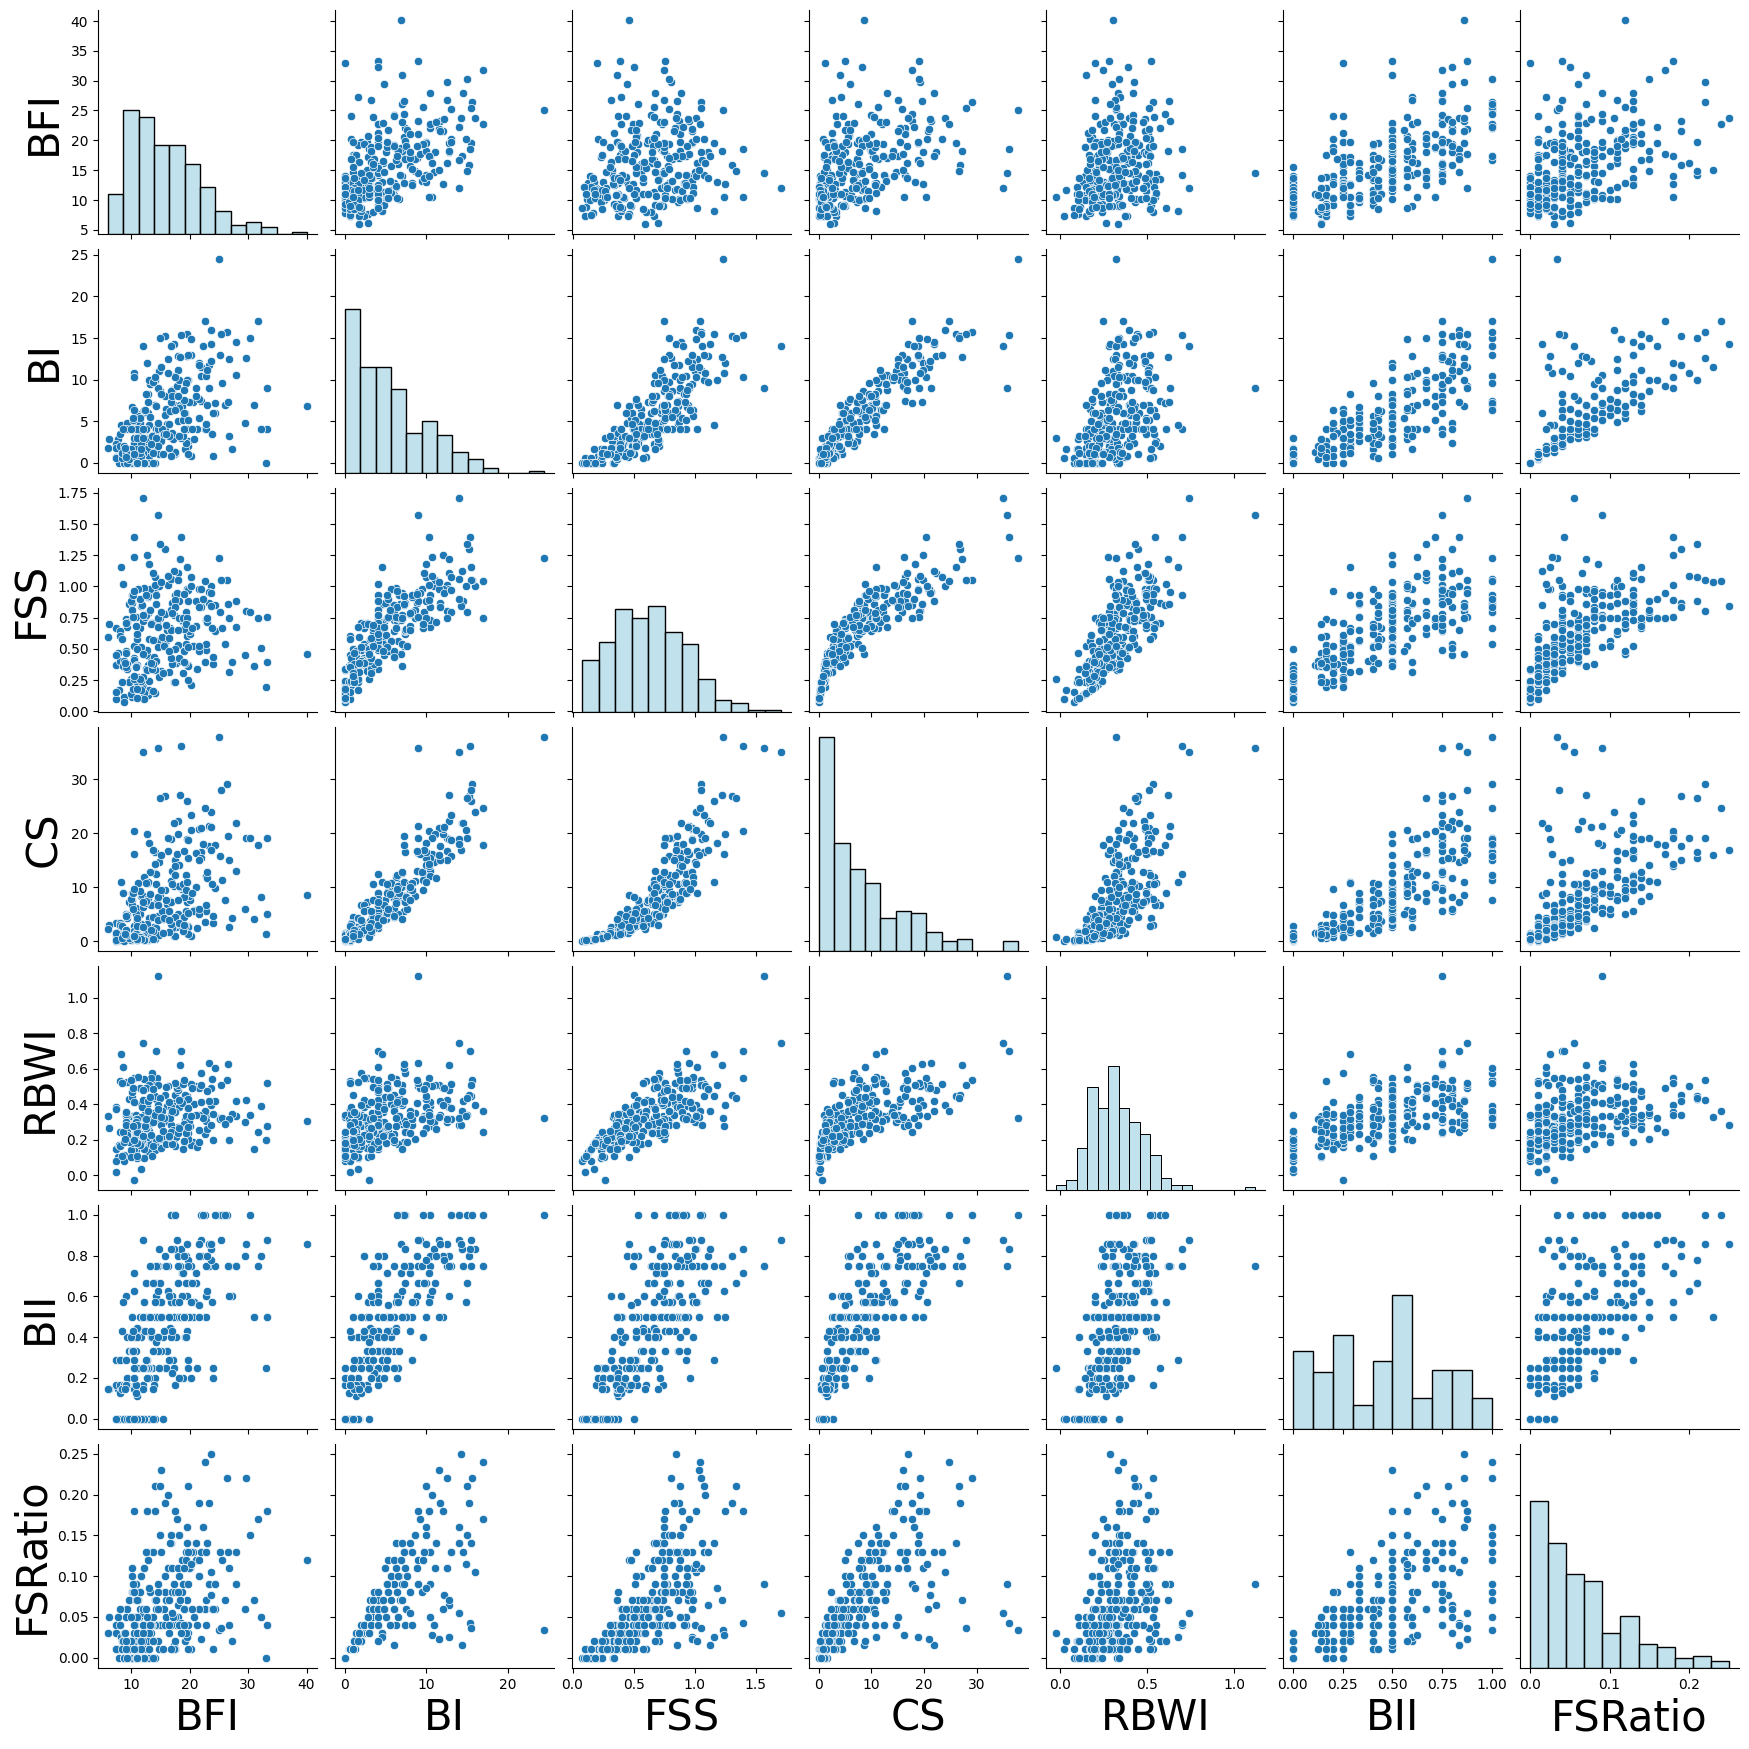

In [ ]:
sns.pairplot(numeric_data, diag_kws={'color': 'lightblue'})
for ax in plt.gcf().axes:
    ax.set_xlabel(ax.get_xlabel(), fontsize=30)
    ax.set_ylabel(ax.get_ylabel(), fontsize=30)
# plt.suptitle('Pairplot of Performance Metrics', fontsize=22, y=1.02)
plt.show()


# Feature Scaling

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

transformed_data = np.log1p(numeric_data)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(transformed_data)
scaled_df = pd.DataFrame(scaled_data, columns=numeric_data.columns)
scaled_df

,BFI,BI,FSS,CS,RBWI,BII,FSRatio
0,0.563777,0.553238,0.379233,0.483336,0.339027,0.584963,0.218649
1,0.802525,0.754118,0.481302,0.715413,0.402824,0.807355,0.386198
2,0.461684,0.697439,0.526470,0.605735,0.269867,0.652050,0.626332
3,0.506488,0.535591,0.462340,0.555812,0.455304,0.415001,0.303207
4,0.442718,0.401180,0.500954,0.569439,0.595280,0.584963,0.175764
...,...,...,...,...,...,...,...
264,0.401350,0.577952,0.563803,0.616227,0.499484,0.584963,0.175764
265,0.517345,0.535591,0.348277,0.425346,0.286007,0.584963,0.303207
266,0.858105,0.642065,0.255389,0.436683,0.207584,0.584963,0.303207
267,0.349514,0.428043,0.328750,0.334745,0.291062,0.321928,0.132465


In [ ]:
descriptive_stats_scaled = scaled_df.describe()
descriptive_stats_scaled.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Batting Scorecard Analysis/EDA and Data Cleaning/descriptive_stats_scaled.csv')

In [ ]:
scaled_df.to_csv('/content/drive/MyDrive/Durham University/Dissertation/Dissertation/Scorecard Analysis v3/Batting Scorecard Analysis/EDA and Data Cleaning/Batsman Performance Metrics (Scaled).csv', index=False)